# RATRAN benchmark: example 0

## 0) Setup

Define Magritte folders

In [1]:
MagritteSetupFolder = '/home/frederik/Dropbox/Astro/Magritte/modules/setup/'
ProjectFolder       = '/home/frederik/MagritteProjects/Ratran/'

Import tools and libraries

In [2]:
import numpy as np

from bokeh.plotting import figure, show, gridplot
from bokeh.palettes import cividis
from bokeh.io       import output_notebook
output_notebook()

from glob import glob
from sys  import path
path.insert(0, MagritteSetupFolder)

# Import from MagritteSetupFolder
from spheres  import deSphere, sphereVar, mapTo3D
from lineData import LineData, planck, relativeDifference
from setup    import setupMagritte
from model    import model

Loading BokehJS ...

## 1) Define model

Assume a 1D model (i.e. 1 ray) with constant temperature, density and abundances and a linear velocity field, yielding a constant velocity gradient

\begin{align}
T(r)     \ &= \ cte, \\
\rho(r)  \ &= \ cte, \\
n_{i}(r) \ &= \ cte, \\
v(r)     \ &= \ \frac{v_{\max} r}{L},
\end{align}

where $L$ is the total length of the model and $v_{\max}$ is the maximum speed reached in the model. (Numerical values given below.) We write it in this way to ensure that velocities in the model are always much smaller than $c$, since our equations for Doppler shift are not valid otherwise.

There is CMB radiation incoming on both ends of the ray as boundary condition.

In [3]:
# Read Ratran data
folder = '/home/frederik/Codes/Ratran/example/frederik/'
temperatureR           = np.loadtxt(folder + 'temperature.txt')
(densityR, abundanceR) = np.loadtxt(folder + 'abundance.txt', unpack=True)
(R, VR)                = np.loadtxt(folder + 'grid.txt',      unpack=True)

model = model (dim=1)

model.ncells = len(R)

model.density     = densityR
model.abundance   = abundanceR
model.temperature = temperatureR

model.x = R
model.y = [0.0 for _ in range(model.ncells)]
model.z = [0.0 for _ in range(model.ncells)]

model.vx = [0.0 for _ in range(model.ncells)]#VR
model.vy = [0.0 for _ in range(model.ncells)]
model.vz = [0.0 for _ in range(model.ncells)]

model.boundary = [0, model.ncells-1]

model.defineRays (nsides=2)

model.getNeighborLists ()

# Write new model data
model.writeInput (ProjectFolder + 'Magritte_files/')

# Run setup
setupMagritte (projectFolder = ProjectFolder, runName = '')

'/home/frederik/MagritteProjects/Ratran/io/18-11-03_19:21:02/'

In [4]:
# Plot model
plot_model_1 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_1.line (model.x, model.density)
plot_model_1.xaxis.axis_label = "x [m]"
plot_model_1.yaxis.axis_label = "density [m^-3]"

plot_model_2 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_2.line (model.x, model.abundance)
plot_model_2.xaxis.axis_label = "x [m]"
plot_model_2.yaxis.axis_label = "abundance [xm^-3]"

plot_model_3 = figure(plot_width=400, plot_height=250)
plot_model_3.line (model.x, model.temperature)
plot_model_3.xaxis.axis_label = "x [m]"
plot_model_3.yaxis.axis_label = "temperature [K]"

plot_model_4 = figure(plot_width=400, plot_height=250)
plot_model_4.line (model.x, model.vx)
plot_model_4.xaxis.axis_label = "x [m]"
plot_model_4.yaxis.axis_label = "velocity_x [m^-3]"

plot_model = gridplot ([[plot_model_1, plot_model_2],[plot_model_3, plot_model_4]])

show (plot_model)

[5.13600e+12 1.21890e+13 1.67390e+13 2.29875e+13 3.15680e+13 4.33515e+13
 5.95335e+13 8.17560e+13 1.12272e+14 1.54180e+14 2.11735e+14 2.90770e+14
 3.99305e+14 5.48360e+14 7.53050e+14 1.03414e+15]


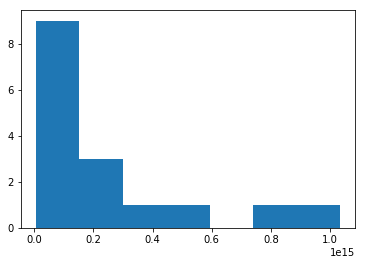

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(model.x, 7)
print(model.x)

### Get Magritte output

In [6]:
ioFolders = glob(ProjectFolder + 'io/*/')
ioFolders.sort()

inputFolders  = [folder +  'input/' for folder in ioFolders]
outputFolders = [folder + 'output/' for folder in ioFolders]

lastOutput = outputFolders[-1]
lastInput  =  inputFolders[-1]

print(lastOutput)

pops_files = glob(lastOutput + 'populations_0*.txt')
Jeff_files = glob(lastOutput + 'Jeff_0*.txt')
J_files    = glob(lastOutput + 'J_*.txt')
nu_files   = glob(lastOutput + 'frequencies_nu*.txt')
lnr_files  = glob(lastOutput + 'frequencies_line_nr*.txt')
eta_files  = glob(lastOutput + 'eta_0*.txt')
chi_files  = glob(lastOutput + 'chi_0*.txt')

pops_files.sort()
Jeff_files.sort()
eta_files.sort()
chi_files.sort()

pops_data = [np.loadtxt(fileName) for fileName in pops_files]
Jeff_data = [np.loadtxt(fileName) for fileName in Jeff_files]
J_data    = [np.loadtxt(fileName) for fileName in J_files]
nu_data   = [np.loadtxt(fileName) for fileName in nu_files]
lnr_data  = [np.loadtxt(fileName) for fileName in lnr_files]
eta_data  = [np.loadtxt(fileName) for fileName in eta_files]
chi_data  = [np.loadtxt(fileName) for fileName in chi_files]

# Import linedata
lineData = LineData (ProjectFolder + '/Magritte_files/linedata/hco+.dat')

/home/frederik/MagritteProjects/Ratran/io/18-11-03_19:21:02/output/


### Plot output

In [7]:
s_min  = 0
s_max  = model.ncells
s_step = 1
ns     = int((s_max - s_min) / s_step)

In [8]:
plot_pops = figure (title='Level populations', width=700, height=400, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    plot_pops.line(range(lineData.nlev), pops_data[0][s], color=cividis(ns)[int(s/s_step)], legend=str(s))
plot_pops.xaxis.axis_label = "number of the level"
plot_pops.yaxis.axis_label = "population [m^-3]"
show (plot_pops)

In [9]:
plot_Jeff = figure (title='Total mean intensity', width=700, height=400, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    plot_Jeff.line(range(lineData.nrad), Jeff_data[1][s], color=cividis(ns)[int(s/s_step)], legend=str(s))
plot_Jeff.xaxis.axis_label = "number of the transition"
plot_Jeff.yaxis.axis_label = "mean intensity J [m^-3]"
show (plot_Jeff)

In [10]:
plot_spectrum = figure (title='Spectrum', width=700, height=500, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    plot_spectrum.line(nu_data[0][s], J_data[0][s], color=cividis(ns)[int(s/s_step)], legend=str(s))
plot_spectrum.xaxis.axis_label = "frequencies [Hz]"
plot_spectrum.yaxis.axis_label = "Mean intensity [W/m^2]"
show(plot_spectrum)

## Analytical solution

Assuming boundary condition $B_{\nu}$ on both sides of the ray, the intensity is given by

\begin{align}
I^{+}_{\nu}(x) \ &= \ B_{\nu} e^{-\tau_{\nu'}(0,x)} + \int_{0}^{x} \text{d}x' \ \eta_{\nu'}(x') \ e^{-\tau_{\nu'}(x', x)} \\
I^{-}_{\nu}(x) \ &= \ B_{\nu} e^{-\tau_{\nu'}(x,L)} + \int_{x}^{L} \text{d}x' \ \eta_{\nu'}(x') \ e^{-\tau_{\nu'}(x, x')}
\end{align}

where the optical depth $\tau^{\pm}_{\nu}$ is defined

\begin{equation}
    \tau_{\nu}(x_{1}, x_{2}) \ = \ \int_{x_{1}}^{x_{2}} \text{d} x' \ \chi_{\nu}(x') .
\end{equation}

The mean intensity is hence given by

\begin{equation}
    J_{\nu}(x) \ = \ \frac{1}{2} \big( I^{+}_{\nu}(x) \ + \ I^{-}_{\nu}(x) \big)
\end{equation}

The frequency dependence of the emissivity and opacity only comes from the line profile

\begin{align}
    \eta_{\nu}(x) \ &= \ \eta_{ij} \phi_{\nu}, \\
    \chi_{\nu}(x) \ &= \ \chi_{ij} \phi_{\nu},
\end{align}

where we assume a Gaussian profile

\begin{equation}
	\phi_{\nu}^{ij}(x) \ = \ \frac{1}{\sqrt{\pi} \ \delta\nu_{ij}} \ \exp \left[-\left(\frac{\nu-\nu_{ij}} {\delta\nu_{ij}(x)}\right)^{2}\right], \hspace{5mm} \text{where} \hspace{5mm} \delta\nu_{ij}(x) \ = \ \frac{\nu_{ij}}{c} \sqrt{ \frac{2 k_{b} T(x)}{m_{\text{spec}}} \ + \ v_{\text{turb}}^{2}(x)}.
\end{equation}

Solving the integral for the optical depth then yields

\begin{equation}
  \tau^{\pm}_{\nu}(x) \ = \ \frac{\chi}{\sqrt{\pi}} \ \int_{0}^{\ell} \text{d} l \ \frac{1}{\delta\nu_{ij}(x \pm l)} \ \exp \left[-\left(\frac{\nu-\nu_{ij}} {\delta\nu_{ij}(x \pm l)}\right)^{2}\right] .
\end{equation}

In [17]:
from scipy.integrate   import quad     as integrate
from scipy.interpolate import interp1d as interpolate

c     = 2.99792458E+8    # [m/s] speed of light
kb    = 1.38064852E-23   # [J/K] Boltzmann's constant
mp    = 1.6726219E-27    # [kg]  proton mass
T_CMB = 2.7254800        # [K]   CMB temperature
vturb = 0.12012E3        # [m/s] turbulent speed


def pops(T):
    return lineData.LTEpop(T) * abun

def emissivity(T):
    return lineData.lineEmissivity(pops(T))

def opacity(T):
    return lineData.lineOpacity(pops(T))

def source(T):
    return emissivity(T) / opacity(T)

def B(nu):
    return planck(T_CMB, nu)

line = 10

L    = model.x[-1]
vmax = model.vx[-1]
nuij = lineData.frequency[line]


def TT(x):
    return interpolate(model.x, model.temperature)(x)

def VV(x):
    return interpolate(model.x, model.vx)(x)

def dnu(x):
    return nuij/c * np.sqrt(2.0*kb*TT(x)/mp + vturb**2)

def phi(nu, x):
    return 1 / (np.sqrt(np.pi) * dnu(x)) * np.exp(-((nu-nuij)/dnu(x))**2)

def eta(nu, x):
    return emissivity(TT(x))[line] * phi(nu, x)

def chi(nu, x):
    return    opacity(TT(x))[line] * phi(nu, x)

def doppler(x1,x2):
    return 1 - (VV(x2) - VV(x1)) / c

def tau_p(nu, x, xs):
    return integrate.quad (lambda xp: chi(nu*doppler(xp,x), xp), xs, x)[0]

def tau_m(nu, x, xs):
    return integrate.quad (lambda xp: chi(nu*doppler(x,xp), xp), x, xs)[0]

def I_p(nu, x):
    result  = B(nu) * np.exp(-tau_p(nu, 0, x))
    result += integrate (lambda xp: eta(nu*doppler(xp,x), xp) * np.exp(-tau_p(nu, x, xp)), 0, x)[0]
    return result

def I_m(nu, x):
    result  = B(nu) * np.exp(-tau_m(nu, x, L))
    result += integrate (lambda xp: eta(nu*doppler(x,xp), xp) * np.exp(-tau_m(nu, x, xp)), x, L)[0]
    return result
    
def J(nu, x):
    return 0.5 * (I_p(nu, x) + I_m(nu, x))

def relativeError(a,b):
    return 2.0 * np.abs((a-b)/(a+b))

In [18]:
plot_line_model = figure(title='Line model: freq dependence', width=450, height=400, y_axis_type="log")
plot_line_error = figure(title='Line error: freq dependence', width=450, height=400, y_axis_type="log")

from tqdm import tqdm

for s in tqdm(range(s_min, s_max, s_step)):
    color = cividis(ns)[int(s/s_step)]
    # model
    vv    = nuij + 8 * dnu(TT(s)) * np.linspace(-1,1,200)
    xx    = model.x[s]
    JJ    = [J(v,xx) for v in vv]
    plot_line_model.line(vv, JJ, color=color)
    #JJ_test = [J_test(v,xx) for v in vv]
    #plot_line_model.line(vv, JJ_test, color=color)
    # Data
    M     = int(lnr_data[0][s][line] - 18    )
    N     = int(lnr_data[0][s][line] + 18 + 1)
    plot_line_model.circle(nu_data[0][s][M:N], J_data[0][s][M:N], color=color, legend=str(s))
    # Error
    vv    = nu_data[0][s][M:N]
    JJ    = [J(v,xx) for v in vv]
    error = relativeError(JJ, J_data[0][s][M:N])
    plot_line_error.circle(vv, error, color=color, legend=str(s)) 

# Combine plots
plot_line = gridplot([[plot_line_model, plot_line_error]])
show (plot_line)

  0%|          | 0/16 [00:00<?, ?it/s]


ValueError: A value in x_new is below the interpolation range.

In [25]:
plot_line_model = figure(title='Line model: space dependence', width=450, height=400, y_axis_type="log")
#for s in range(s_min, s_max, 2):
# model
xx = np.array(model.x)
plot_line_model.line(xx, J(nuij,xx))
# data
M = int(lnr_data[0][0][line])
plot_line_model.circle(xx, J_data[0][:,M])
plot_line_model.xaxis.axis_label = "x [m]"
plot_line_model.yaxis.axis_label = "Mean intensity [W/m^2]"

plot_line = gridplot([[plot_line_model, plot_line_error]])

show (plot_line)

In [26]:
plot_line_model = figure(title='Line model', width=450, height=400, y_axis_type="log")
#for s in range(s_min, s_max, 2):
# model
xx = np.array(model.x)
plot_line_model.line(xx, J(nuij,xx))
# data
M = int(lnr_data[0][0][line])
plot_line_model.circle(xx, Jeff_data[0][:,line])

plot_line = gridplot([[plot_line_model, plot_line_error]])

show (plot_line)